In [ ]:
import sys
from pathlib import Path
import pandas as pd

src_dir = Path.cwd().parent

# sys.path strictly for importing modules
sys.path.append(str(src_dir))
from utils.data_utils import *

HOSP_DIR = src_dir / "data" / "mimic-iv" / "hosp"

In [5]:
diagnoses_path = HOSP_DIR / "diagnoses_icd.csv.gz"

diagnoses = load_data(diagnoses_path)
print(diagnoses.shape)
diagnoses.head()

(6364488, 5)


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [14]:
diabetic_patients = get_diabetic_patients(diagnoses)
print(diabetic_patients.shape)
top_codes = diabetic_patients["icd_code"].value_counts().sort_values(ascending=False).head(10)
print(top_codes)
diabetic_patients.head()

(179647, 5)
icd_code
25000     43077
E119      26266
E1122     18564
E1165     10248
25060      6998
E1140      6396
E1151      4806
25040      4329
E1142      3994
E11319     3654
Name: count, dtype: int64


,subject_id,hadm_id,seq_num,icd_code,icd_version
94,10000635,20642640,7,E119,10
98,10000635,26134563,2,25000,9
323,10000980,20897796,5,E1122,10
326,10000980,20897796,8,E11319,10
336,10000980,20897796,18,E1151,10


<Axes: title={'center': 'Top 10 ICD Codes for Diabetic Patients'}, xlabel='ICD Code', ylabel='Count'>

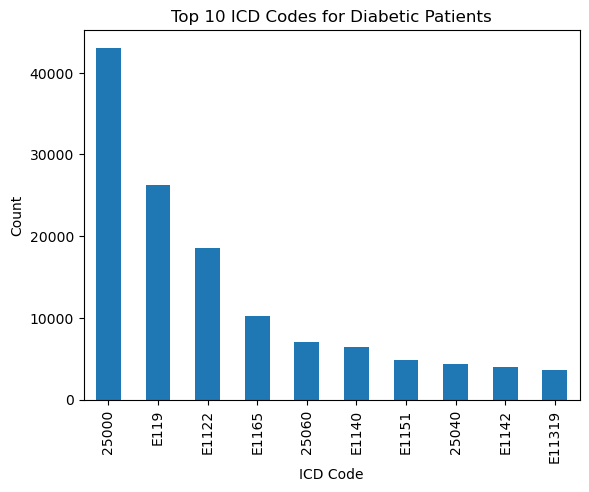

In [15]:
top_codes.plot(kind="bar", title="Top 10 ICD Codes for Diabetic Patients", xlabel="ICD Code", ylabel="Count")

In [20]:
unique_patients = diabetic_patients.drop_duplicates(subset=["subject_id"])

# Store as a CSV
unique_patients.to_csv("../data/processed/diabetic_patients.csv.gz", index=False, compression="gzip")
unique_patients.shape

(46148, 5)